In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2021.12.27-01.02.csv')
df2 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2022.03.14-03.20.csv')
df3 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2022.04.18-04.24.csv')


In [2]:
nature = pd.concat([df1,df2,df3])
# display(nature)
nature.info()
nature.reset_index(drop=False,inplace=True)
display(nature)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509394 entries, 0 to 168930
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   기관 명           509394 non-null  object 
 1   모델명            509394 non-null  object 
 2   시리얼            509394 non-null  object 
 3   구분             509394 non-null  int64  
 4   초미세먼지(㎍/㎥)     509394 non-null  int64  
 5   미세먼지(㎍/㎥)      509394 non-null  int64  
 6   기온(℃)          508987 non-null  float64
 7   상대습도( %)       508987 non-null  float64
 8   풍향(°)          27298 non-null   float64
 9   풍속(m/s)        27298 non-null   float64
 10  돌풍 풍향(°)       27298 non-null   float64
 11  돌풍 풍속(m/s)     27298 non-null   float64
 12  조도(lux)        418707 non-null  float64
 13  자외선(UVI)       418564 non-null  float64
 14  소음(dB)         506902 non-null  float64
 15  진동_x(g)        416988 non-null  float64
 16  진동_y(g)        416988 non-null  float64
 17  진동_z(g)        416988 non-nul

,index,기관 명,모델명,시리얼,구분,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),풍향(°),...,진동_y(g),진동_z(g),진동_x 최대(g),진동_y 최대(g),진동_z 최대(g),흑구 운도(℃),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),전송시간,등록일자
0,0,서울시,SDOT001,OC3CL200025,1,7,10,-11.3,47.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,14,2.021120e+11,2021-12-27 0:07
1,1,서울시,SDOT001,OC3CL200014,1,5,8,-10.2,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.1,7,12,2.021120e+11,2021-12-27 0:07
2,2,서울시,SDOT001,OC3CL200023,1,7,10,-10.1,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,12,2.021120e+11,2021-12-27 0:07
3,3,서울시,SDOT001,OC3CL200017,1,11,16,-10.2,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.5,16,23,2.021120e+11,2021-12-27 0:07
4,4,서울시,SDOT001,OC3CL200021,1,8,13,-10.6,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,15,2.021120e+11,2021-12-27 0:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509389,168926,서울시,SDOT001,V02Q1941015,1,35,35,17.6,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23,30,2.022040e+11,2022-04-24 23:08
509390,168927,서울시,SDOT001,V02Q1941000,1,12,12,17.6,86.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16,16,2.022040e+11,2022-04-24 23:08
509391,168928,서울시,SDOT001,V02Q1941006,1,2,3,17.5,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2.022040e+11,2022-04-24 23:08
509392,168929,서울시,SDOT001,V02Q1940955,1,19,19,17.7,81.0,NaN,...,0.07,1.03,0.05,0.13,1.11,NaN,17,18,2.022040e+11,2022-04-24 23:08


In [3]:
df = pd.DataFrame(np.random.randint(150,7000,size=(509394,1)),columns=['co2'])
display(df)

,co2
0,385
1,1764
2,1261
3,1820
4,665
...,...
509389,1774
509390,1628
509391,1463
509392,371


In [4]:
result = pd.concat([nature,df],axis=1)
# display(result)
new = result[['기온(℃)','상대습도( %)','co2']]
new.dropna(axis=0)
display(new)

,기온(℃),상대습도( %),co2
0,-11.3,47.0,385
1,-10.2,44.0,1764
2,-10.1,42.0,1261
3,-10.2,42.0,1820
4,-10.6,44.0,665
...,...,...,...
509389,17.6,84.0,1774
509390,17.6,86.0,1628
509391,17.5,85.0,1463
509392,17.7,81.0,371


In [8]:
# new.isnull().sum()
# new.describe()
new = new.dropna(axis=0)
new.isnull().sum()

기온(℃)       0
상대습도( %)    0
co2         0
dtype: int64

In [9]:
# 0 : 잔다, 1 : 안잔다
# 습도 50~60 -> 0
# co2 : 1500이상 -> 0
# 기온 : 20~23 -> 1

# if (new['기온(℃)']<20) | (new['기온(℃)'] > 23):
#     if (new['co2'] >= 1500):
#         if ((new['상대습도( %)']>=50) & (new['상대습도( %)']<=60)):
#             new['label'] = 0
# else :
#     new['label'] = 1
    
# display(new)

new['label'] = np.where(((new['기온(℃)']<20) | (new['기온(℃)']>23)) & (new['co2'] >= 1500) & ((new['상대습도( %)']>=50) & (new['상대습도( %)']<=60)), 0, 1)


In [10]:
display(new)
new.to_csv('nature_data.csv')

,기온(℃),상대습도( %),co2,label
0,-11.3,47.0,385,1
1,-10.2,44.0,1764,1
2,-10.1,42.0,1261,1
3,-10.2,42.0,1820,1
4,-10.6,44.0,665,1
...,...,...,...,...
509389,17.6,84.0,1774,1
509390,17.6,86.0,1628,1
509391,17.5,85.0,1463,1
509392,17.7,81.0,371,1


In [11]:
import matplotlib.pyplot as plt

new['label'].value_counts()

1    480147
0     28840
Name: label, dtype: int64

<BarContainer object of 2 artists>

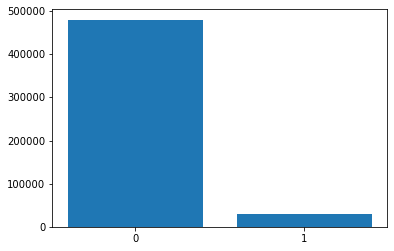

In [12]:
plt.bar(['0','1'],new['label'].value_counts())

In [13]:
x_data = new[['기온(℃)','상대습도( %)','co2']]
t_data = new['label']

<BarContainer object of 2 artists>

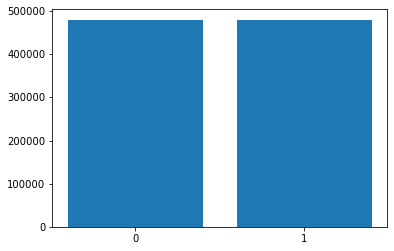

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
# label_s = new['label'].value_counts()
# label_s_x = np.reshape([0,1],(-1,1))

x_data,t_data = ros.fit_resample(x_data,t_data)

# plt.bar(x_data, t_data)
plt.bar(['0','1'],t_data.value_counts())

In [23]:
label_s = new['label'].value_counts()
type(label_s.index)
label_s.values

pandas.core.indexes.numeric.Int64Index